In [32]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as stats
from pandas import DataFrame, Series
from sklearn.preprocessing import normalize, MinMaxScaler
np. random.seed(78)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 400)

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [5]:
mpl.rcParams['image.cmap'] = 'viridis'
%matplotlib inline
mpl.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (10, 6)

from sklearn import datasets

In [6]:
iris_data = datasets.load_iris()

In [7]:
iris_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris_df = pd.DataFrame(data = iris_data['data'], columns= iris_data['feature_names'])

In [9]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
X = iris_df.iloc[0:100, [0,2]].values

In [11]:
X.shape

(100, 2)

In [12]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
y = np.where(iris_data['target'][:100] == 0, -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [15]:
len(y)

100

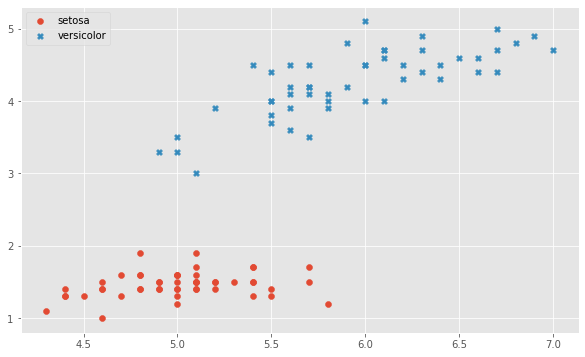

In [17]:
plt.scatter(X[:50,0], X[:50,1], marker= 'o', label ='setosa')
plt.scatter(X[50:100,0], X[50:100,1], marker= 'X', label ='versicolor')
plt.legend()
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
normalizer = MinMaxScaler()

In [26]:
normalizer.fit(X_train, y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [27]:
n_X_train = normalizer.transform(X_train)
n_X_test = normalizer.transform(X_test)

In [30]:
lr = LogisticRegression()
n_lr = LogisticRegression()

In [31]:
n_lr.fit(n_X_train, y_train)
lr.fit(n_X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
n_y_train_hat = n_lr.predict(n_X_train)
y_train_hat = lr.predict(X_train)
n_y_test_hat = n_lr.predict(n_X_test)
y_test_hat = lr.predict(n_X_test)

In [40]:
print('Training un -normalized')
print(classification_report(y_train, y_train_hat))
print(accuracy_score(y_train, y_train_hat))

Training un -normalized
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00        31
           1       0.54      1.00      0.70        36

    accuracy                           0.54        67
   macro avg       0.27      0.50      0.35        67
weighted avg       0.29      0.54      0.38        67

0.5373134328358209


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print('Testing un -normalized')
print(classification_report(y_test, y_test_hat))
print(accuracy_score(y_test, y_test_hat))

Testing un -normalized
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        14

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

1.0


In [41]:
print('Training normalized')
print(classification_report(y_train, n_y_train_hat))
print(accuracy_score(y_train, n_y_train_hat))

Training normalized
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        36

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

1.0


In [42]:
print('Testing normalized')
print(classification_report(y_test, n_y_test_hat))
print(accuracy_score(y_test, n_y_test_hat))

Testing normalized
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        14

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33

1.0
